In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
#sns.set()

In [2]:
users = pd.read_json("all_users.json")

In [64]:
def sns_barplot(x, y, title=""):
    plt.figure(figsize=(14,8))
    chart = sns.barplot(
        x=x,
        y=y,
        palette='Set1'
    )
    chart.set_xticklabels(
        chart.get_xticklabels(), 
        rotation=45, 
        horizontalalignment='right',
        fontweight='normal',
        fontsize='x-large',
        color='black'
    )
    ax = chart
    for p in ax.patches:
         ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=12, color='black', xytext=(0, 20),
             textcoords='offset points')

    _ = chart.set_ylim(0, max(y) + (max(y)*.15))
    plt.title(title)
    #plt.show()
    filename = title.replace(" ", "_").lower()+".png" if title != "" else "fig.png"
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

In [65]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49975 entries, 0 to 49974
Data columns (total 4 columns):
Company     49975 non-null object
Location    49975 non-null object
School      49975 non-null object
name        49975 non-null object
dtypes: object(4)
memory usage: 1.5+ MB


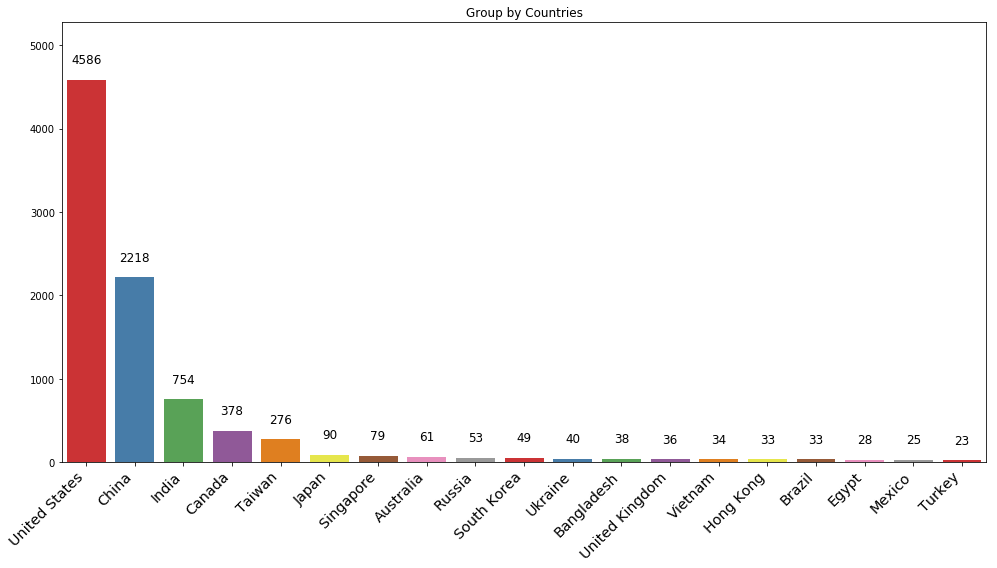

In [66]:
countries = [i for i in users.Location.value_counts().index[1:20]]
countries_vals = [i for i in users.Location.value_counts()[1:20].values]
sns_barplot(countries, countries_vals, "Group by Countries")

In [28]:
to_replace = {"amazon": "Amazon", "microsoft": "Microsoft", "tencent": "Tencent", "google": "Google"}
for rep in to_replace:
    for i in users.loc[users["Company"].str.contains(rep, flags=re.IGNORECASE, regex=True)].Company.unique():
        users['Company'][users['Company'] == i] = to_replace[rep]

In [29]:
users['Company'][users['Company'] == 'MS']="Microsoft"

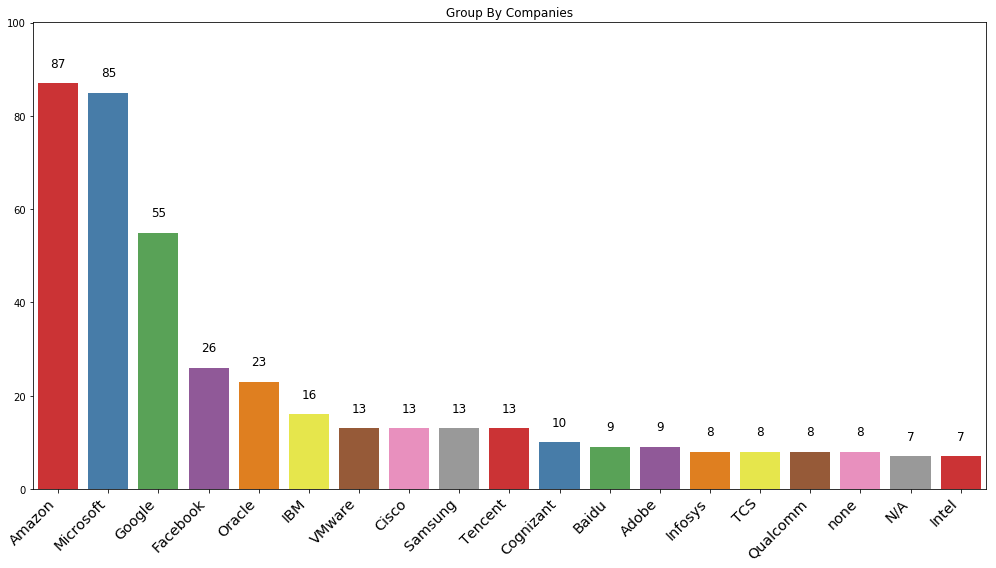

In [67]:
companies = [i for i in users.Company.value_counts().index[1:20]]
companies_vals = [i for i in users.Company.value_counts()[1:20].values]
sns_barplot(companies, companies_vals, "Group By Companies")

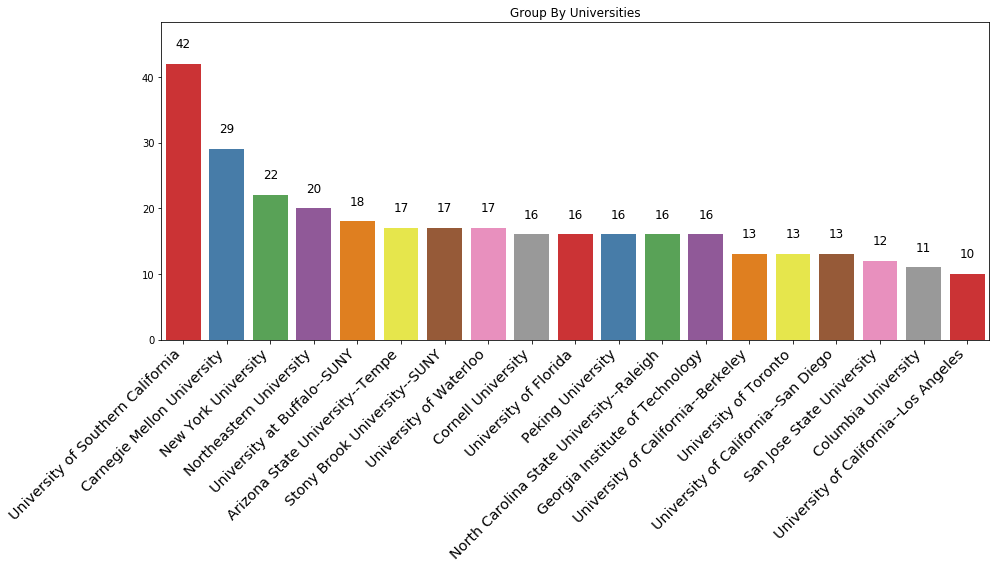

In [68]:
schools = [i for i in users.School.value_counts().index[1:20]]
schools_vals = [i for i in users.School.value_counts()[1:20].values]
sns_barplot(schools, schools_vals, "Group By Universities")

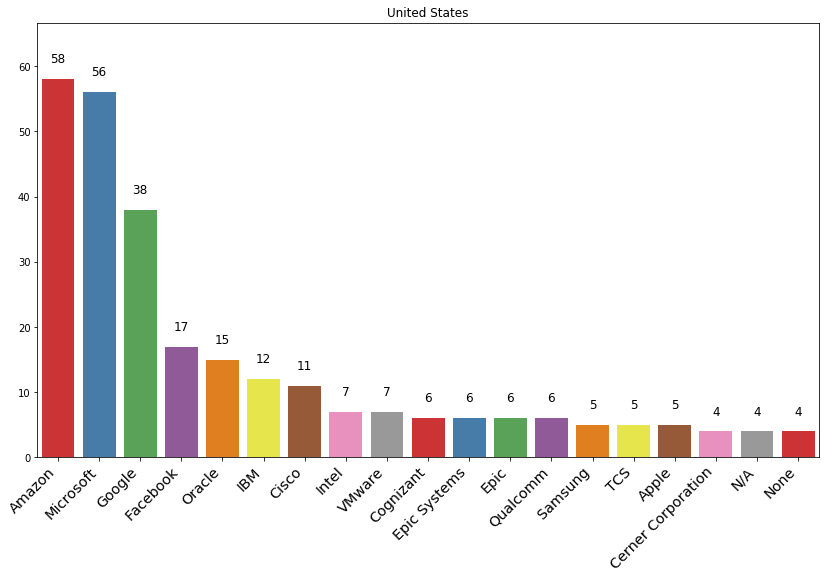

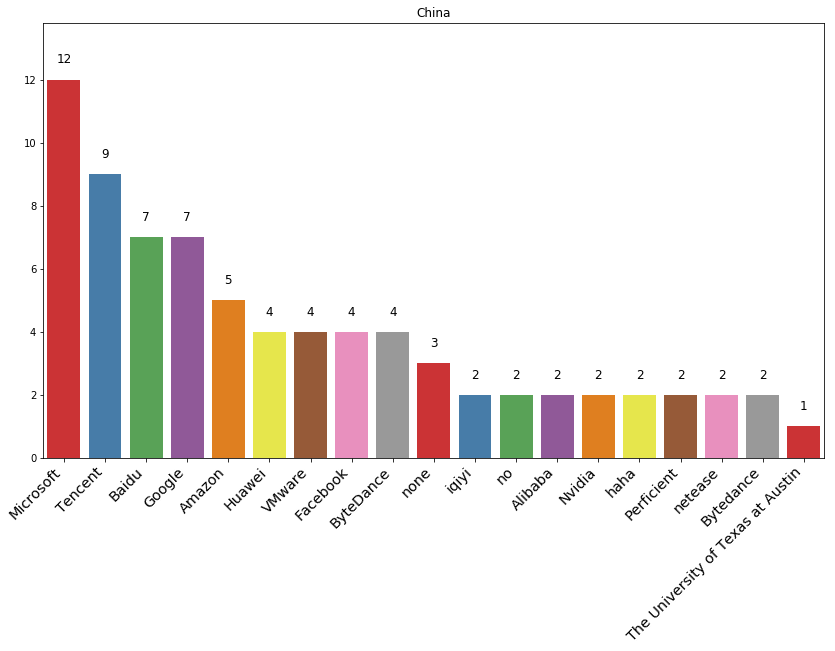

In [49]:
for country in countries[:2]:
    temp_users = users[users["Location"] == country]
    companies = [i for i in temp_users.Company.value_counts().index[1:20]]
    companies_vals = [i for i in temp_users.Company.value_counts()[1:20].values]
    sns_barplot(companies, companies_vals, country)

             48072
Amazon          87
Microsoft       85
Google          55
Facebook        26
Oracle          23
IBM             16
Cisco           13
Samsung         13
VMware          13
Name: Company, dtype: int64

In [57]:
by_loc = (users.groupby("Location")
     .filter(lambda x : len(x) > 40)
     .groupby(["Location", "Company"])
     .size()
     .unstack())
by_loc

Company,,(Private),-,...,/,1QBit Information Technology,20Degrees,51信用卡,<h1>ORACLE </h1>,A,...,小榕科技,快手,愚公移山,成都正合联众网络科技有限公司,政大吉他社基地,无限讯奇,深圳市深信服电子科技有限公司,趣店,这个可不能告诉你呵呵 LLC,阿里妈妈
Location,,,,,,,,,,,,,,,,,,,,,
,40751.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Australia,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,310.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
China,1964.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,...,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0
India,538.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Japan,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Russia,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Singapore,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Korea,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


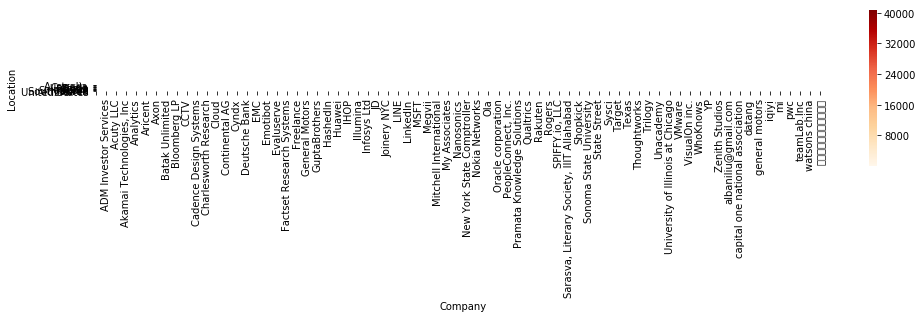

In [59]:
plt.figure(figsize=(14,14))
g = sns.heatmap(
    by_loc, 
    square=True, # make cells square
    cbar_kws={'fraction' : 0.01}, # shrink colour bar
    cmap='OrRd', # use orange/red colour map
    linewidth=1 # space between cells
)